In [30]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
con=sqlite3.connect("emissions.db")
cur=con.cursor()

In [ ]:
cleaned_data=pd.read_csv("co2 emissions/Cleaned_Trends_for_SQL_Analysis.csv")   #Load the cleaned CSV
cleaned_data.to_sql("emissions", con,if_exists='replace', index=False)  #Write to SQLite table

7385

In [ ]:
#Verify import
new_data=pd.read_sql("""select * from sqlite_master""", con)
new_data

,type,name,tbl_name,rootpage,sql
0,table,emissions,emissions,2,"CREATE TABLE ""emissions"" (\n""Unnamed: 0"" INTEG..."


In [5]:
new_data=pd.read_sql("""select * from emissions""",con)
new_data

,Unnamed: 0,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [25]:
#total emissions per make
new_data=pd.read_sql("""select Make,sum("CO2 Emissions(g/km)") as co2_emissions from emissions 
                     group by 1
                     order by 2 desc""",con)
new_data

,Make,co2_emissions
0,FORD,163901
1,CHEVROLET,155436
2,BMW,133862
3,MERCEDES-BENZ,116225
4,GMC,98373
5,PORSCHE,97362
6,TOYOTA,74060
7,AUDI,71742
8,DODGE,67985
9,JEEP,62836


In [ ]:
#max emissions for each vehicle class of max engine size
new_data=pd.read_sql("""select "Vehicle Class",max("Engine Size(L)") as max_engine_size,sum("CO2 Emissions(g/km)") as co2_emissions from emissions 
                     group by 1
                     order by 2 desc""",con)
new_data

,Vehicle Class,max_engine_size,co2_emissions
0,TWO-SEATER,8.4,127629
1,VAN - PASSENGER,6.8,26216
2,MID-SIZE,6.8,252042
3,STATION WAGON - MID-SIZE,6.7,12651
4,FULL-SIZE,6.7,168259
5,COMPACT,6.7,221446
6,SUV - STANDARD,6.4,224055
7,SUBCOMPACT,6.2,149348
8,STATION WAGON - SMALL,6.2,50417
9,PICKUP TRUCK - STANDARD,6.2,162214


In [29]:
#fuel efficient vehicle
new_data=pd.read_sql("""select "Vehicle Class",round(sum("Fuel Consumption Comb (L/100 km)"),2) as fuel_consumption from emissions 
                     group by 1
                     order by 2""",con)
new_data

,Vehicle Class,fuel_consumption
0,VAN - CARGO,411.8
1,STATION WAGON - MID-SIZE,542.3
2,SPECIAL PURPOSE VEHICLE,828.8
3,MINIVAN,954.8
4,VAN - PASSENGER,1266.7
5,PICKUP TRUCK - SMALL,1863.1
6,STATION WAGON - SMALL,2152.8
7,MINICOMPACT,3315.0
8,TWO-SEATER,5483.8
9,SUBCOMPACT,6408.1


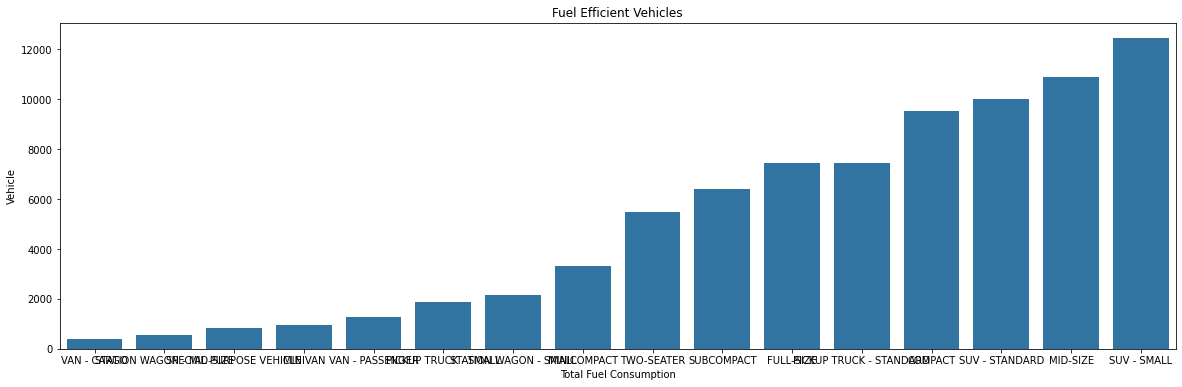

In [42]:
plt.figure(figsize=(20,6))
sns.barplot(x="Vehicle Class", y="fuel_consumption", data=new_data)
plt.xlabel("Total Fuel Consumption")
plt.ylabel("Vehicle")
plt.title("Fuel Efficient Vehicles")
plt.show()

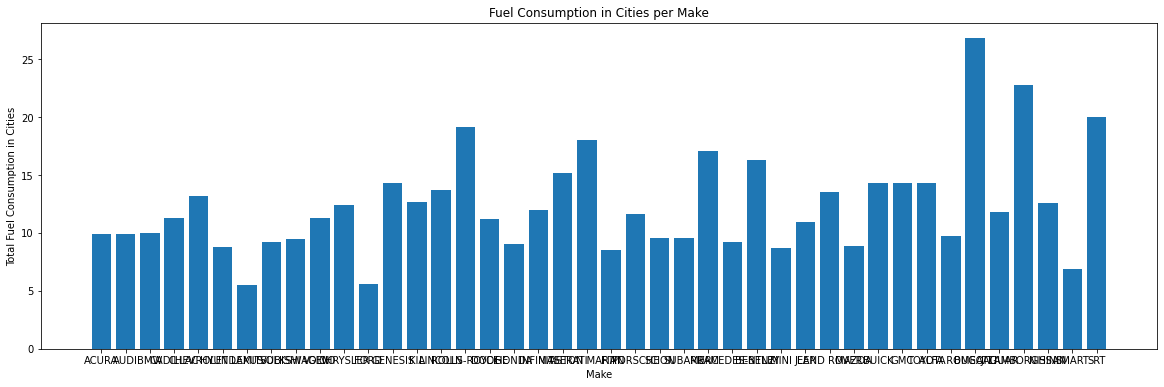

In [ ]:
query = """select Make,"Vehicle Class","Fuel Consumption City (L/100 km)" as city_fuel_consumption
 from emissions 
                     group by 1
                     order by 2"""
new_test_data = pd.read_sql(query, con)

plt.figure(figsize=(20,6))
# plt.plot(new_test_data["Make"], new_test_data["city_fuel_consumption"], marker='o')
plt.xlabel("Make")
plt.ylabel("Total Fuel Consumption in Cities")
plt.title("Fuel Consumption in Cities per Make")
plt.bar(new_test_data["Make"], new_test_data["city_fuel_consumption"])
plt.show()
